## In this notebook, we'll analyze the labels we are left with after the initial filtering pass
Labels are generated in the candidate_label_creation notebook and then filtered in the candidate_filter notebook.

In [6]:
import os

In [7]:
work_dir = "/Users/nicklein/Documents/grad_school/Research/data"
os.environ['STORE'] = "{}/wikidata.sqlite3.db".format(work_dir)
os.environ['DATA'] = "{}/Q44".format(work_dir)
os.environ['NAME'] = "Q44"
os.environ["OUT"] = "{}/Q44_profiler_output".format(work_dir)

Combining filtered label files...

*One thing to note is that for files where we mix interval and non-interval labels, the current format causes labels to be ambiguous - we can't tell the difference between a non-interval label and an interval label that has no upper bound. This being said, this doesn't impact looking at the distribution of positives / support for the labels.*

In [8]:
!kgtk cat \
-i $OUT/$NAME.candidate_labels_avl_string_filtered.tsv \
-i $OUT/$NAME.candidate_labels_avl_quantity_filtered.tsv \
-i $OUT/$NAME.candidate_labels_avl_time.year_filtered.tsv \
-i $OUT/$NAME.candidate_labels_rel_item_filtered.tsv \
-i $OUT/$NAME.candidate_labels_ail_quantity_filtered.tsv \
-i $OUT/$NAME.candidate_labels_ail_time.year_filtered.tsv \
-i $OUT/$NAME.candidate_labels_ravl_filtered.tsv \
-i $OUT/$NAME.candidate_labels_rail_filtered.tsv \
-o $OUT/$NAME.candidate_labels_filtered_all.tsv

defining some filenames and helper function for viewing label support / positives distribution

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

label_file_prefix = "/Users/nicklein/Documents/grad_school/Research/data/Q44_profiler_output/Q44."

avl_string_file = "{}candidate_labels_avl_string_filtered.tsv".format(label_file_prefix)
avl_quantity_file = "{}candidate_labels_avl_quantity_filtered.tsv".format(label_file_prefix)
avl_year_file = "{}candidate_labels_avl_time.year_filtered.tsv".format(label_file_prefix)
rel_file = "{}candidate_labels_rel_item_filtered.tsv".format(label_file_prefix)
ail_quantity_file = "{}candidate_labels_ail_quantity_filtered.tsv".format(label_file_prefix)
ail_year_file = "{}candidate_labels_ail_time.year_filtered.tsv".format(label_file_prefix)
ravl_file = "{}candidate_labels_ravl_filtered.tsv".format(label_file_prefix)
rail_file = "{}candidate_labels_rail_filtered.tsv".format(label_file_prefix)
all_file = "{}candidate_labels_filtered_all.tsv".format(label_file_prefix)

def plot_label_supports_and_positives(filename):
    df = pd.read_csv(filename, delimiter = '\t')
    supports = df.loc[:,"support"]
    positives = df.loc[:,"positives"]
    
    fig, (ax_sup, ax_pos) = plt.subplots(1, 2, figsize = (14,5))
    
    ax_sup.hist(supports, bins = np.arange(0,1.01,.02))
    ax_sup.set_xlabel("Support (# positives for this label / # entities with this label's type)")
    ax_sup.set_ylabel("# Labels")
    ax_sup.set_title("Distribution of Support for Labels")
    #ax_sup.set_yscale("log")
    
    ax_pos.hist(positives, bins = range(0,max(positives)+1,1))
    ax_pos.set_xlabel("# Positives")
    ax_pos.set_ylabel("# Labels")
    ax_pos.set_title("Distribution of Number of Positives for Labels")
    ax_pos.set_yscale("log")
 
    plt.tight_layout()
    plt.show()
    
    df_sorted_by_support = df.sort_values(by = "support")
    print("Examples of labels at percentiles of support...")
    print("0th percentile:")
    print(df_sorted_by_support.iloc[0])
    print("\n25th percentile:")
    print(df_sorted_by_support.iloc[int(len(df)*.25)])
    print("\n50th percentile:")
    print(df_sorted_by_support.iloc[int(len(df)*.5)])
    print("\n75th percentile:")
    print(df_sorted_by_support.iloc[int(len(df)*.75)])
    print("\n100th percentile:")
    print(df_sorted_by_support.iloc[len(df) - 1])
    
    df_sorted_by_positives = df.sort_values(by = "positives")
    print("\nExamples of labels at percentiles of positives...")
    print("0th percentile:")
    print(df_sorted_by_positives.iloc[0])
    print("\n25th percentile:")
    print(df_sorted_by_positives.iloc[int(len(df)*.25)])
    print("\n50th percentile:")
    print(df_sorted_by_positives.iloc[int(len(df)*.5)])
    print("\n75th percentile:")
    print(df_sorted_by_positives.iloc[int(len(df)*.75)])
    print("\n100th percentile:")
    print(df_sorted_by_positives.iloc[len(df) - 1])

# def get_df_supports_and_positives(filename):
#     df = pd.read_csv(filename, delimiter = '\t')
#     supports = df.loc[:,"support"]
#     positives = df.loc[:,"positives"]
#     return (df, supports, positives)

# avl_string_df, avl_string_supports, avl_string_positives = get_df_supports_and_positives(avl_string_file)
# avl_quantity_df, avl_quantity_supports, avl_quantity_positives = get_df_supports_and_positives(avl_quantity_file)
# avl_year_df, avl_year_supports, avl_year_positives = get_df_supports_and_positives(avl_year_file)
# rel_df, rel_supports, rel_positives = get_df_supports_and_positives(rel_file)
# ail_quantity_df, ail_quantity_supports, ail_quantity_positives = get_df_supports_and_positives(ail_quantity_file)
# ail_year_df, ail_year_supports, ail_year_positives = get_df_supports_and_positives(ail_year_file)
# ravl_df, ravl_supports, ravl_positives = get_df_supports_and_positives(ravl_file)
# rail_df, rail_supports, rail_positives = get_df_supports_and_positives(rail_file)

### AVL - string

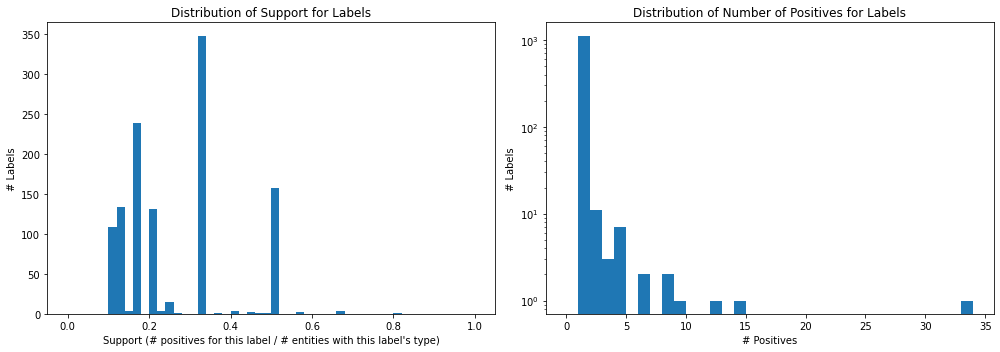

Examples of labels at percentiles of support...
0th percentile:
node1                       Q431289
label                          P373
node2                        Tuborg
prop_label    'Commons category'@en
positives                         1
support                         0.1
id                            E1944
Name: 0, dtype: object

25th percentile:
node1                     Q4209223
label                         P935
node2                   საქართველო
prop_label    'Commons gallery'@en
positives                        1
support                   0.166667
id                           E2322
Name: 378, dtype: object

50th percentile:
node1                           Q43702
label                            P2258
node2                              206
prop_label    'mobile country code'@en
positives                            1
support                            0.2
id                               E2428
Name: 484, dtype: object

75th percentile:
node1                         Q1323642


In [57]:
plot_label_supports_and_positives(avl_string_file)

### AVL - year

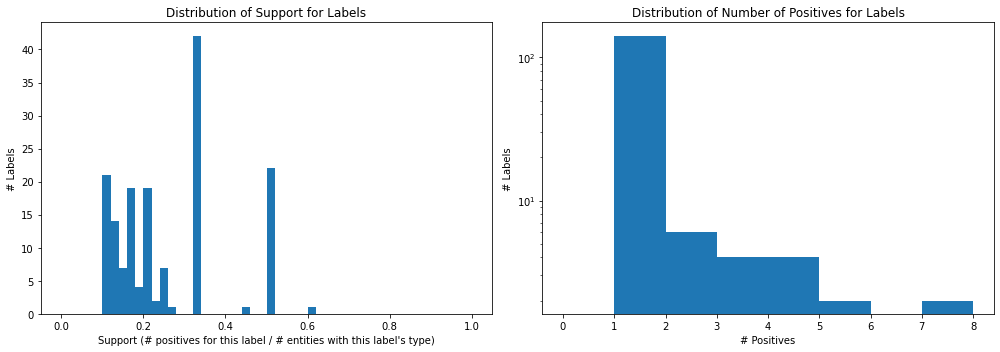

Examples of labels at percentiles of support...
0th percentile:
node1                Q431289
label                   P571
node2                   1873
prop_label    'inception'@en
positives                  1
support                  0.1
id                      E293
Name: 0, dtype: object

25th percentile:
node1                 Q40050
label                   P571
node2                   1996
prop_label    'inception'@en
positives                  1
support             0.142857
id                      E328
Name: 35, dtype: object

50th percentile:
node1                   Q154
label                   P571
node2                   2013
prop_label    'inception'@en
positives                  1
support                  0.2
id                      E361
Name: 68, dtype: object

75th percentile:
node1               Q1323642
label                   P571
node2                   1922
prop_label    'inception'@en
positives                  1
support             0.333333
id                      E390

In [58]:
plot_label_supports_and_positives(avl_year_file)

### AVL - quantity

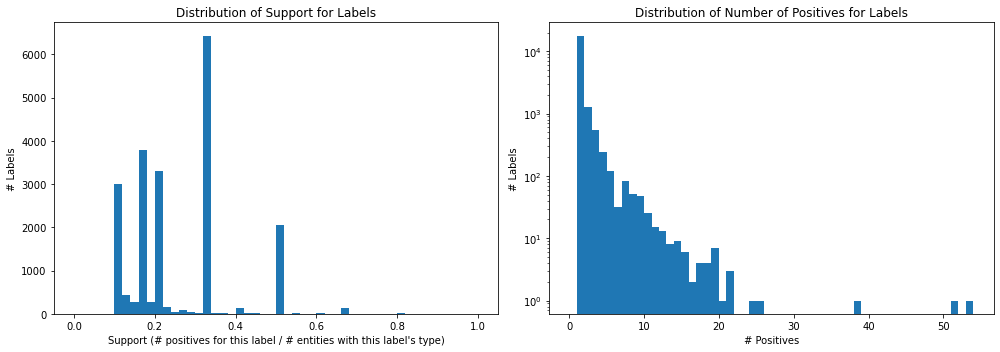

Examples of labels at percentiles of support...
0th percentile:
node1                        Q431289
label                          P2665
node2                   +0.4Q2080811
prop_label    'alcohol by volume'@en
positives                          1
support                          0.1
id                            E47955
Name: 0, dtype: object

25th percentile:
node1                  Q4209223
label                     P6794
node2                +440Q81893
prop_label    'minimum wage'@en
positives                     1
support                0.166667
id                       E55307
Name: 7352, dtype: object

50th percentile:
node1                  Q43702
label                   P1082
node2               +82521653
prop_label    'population'@en
positives                   1
support                   0.2
id                     E56007
Name: 8052, dtype: object

75th percentile:
node1                        Q1520223
label                           P2299
node2                +2353.137Q550207


In [59]:
plot_label_supports_and_positives(avl_quantity_file)

### AIL - year

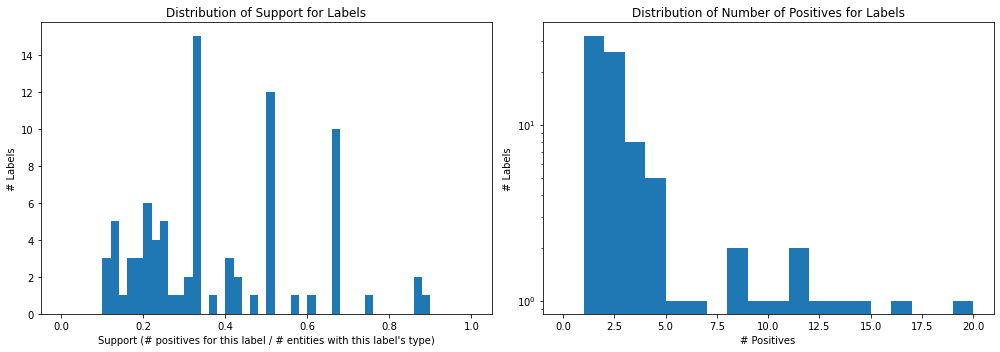

Examples of labels at percentiles of support...
0th percentile:
node1                 Q131734
label                    P571
node2                     NaN
upper_bound              1797
prop_label     'inception'@en
positives                   9
support              0.103448
id                        E19
Name: 0, dtype: object

25th percentile:
node1                   Q7270
label                    P571
node2                     NaN
upper_bound            1635.5
prop_label     'inception'@en
positives                   4
support              0.222222
id                        E40
Name: 21, dtype: object

50th percentile:
node1                 Q202686
label                    P571
node2                     NaN
upper_bound              1884
prop_label     'inception'@en
positives                   1
support              0.333333
id                        E59
Name: 40, dtype: object

75th percentile:
node1                          Q5
label                        P570
node2                  

In [60]:
plot_label_supports_and_positives(ail_year_file)

### AIL - quantity

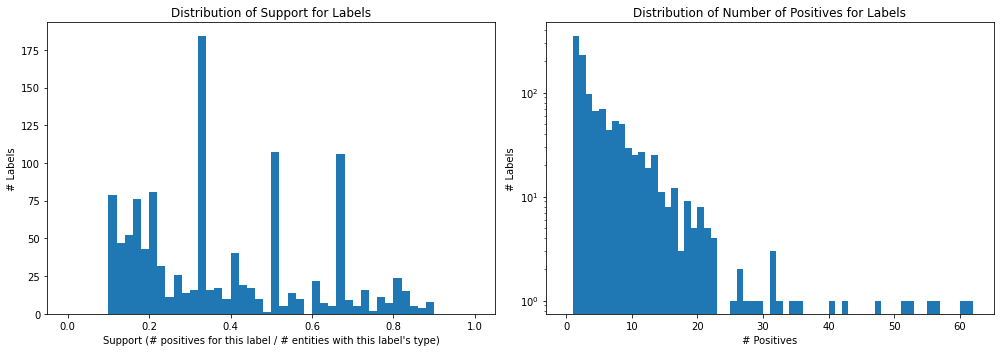

Examples of labels at percentiles of support...
0th percentile:
node1                Q4830453
label                   P1128
si_units                  NaN
wd_units                  NaN
node2                     NaN
upper_bound            103678
prop_label     'employees'@en
positives                   5
support                   0.1
id                       E303
Name: 0, dtype: object

25th percentile:
node1                                Q6256
label                                P2132
si_units                               NaN
wd_units                             Q4917
node2                                49052
upper_bound                        50383.5
prop_label     'nominal GDP per capita'@en
positives                                5
support                           0.192308
id                                    E590
Name: 287, dtype: object

50th percentile:
node1                                              Q4209223
label                                                 P2219
si

In [61]:
plot_label_supports_and_positives(ail_quantity_file)

### RELs

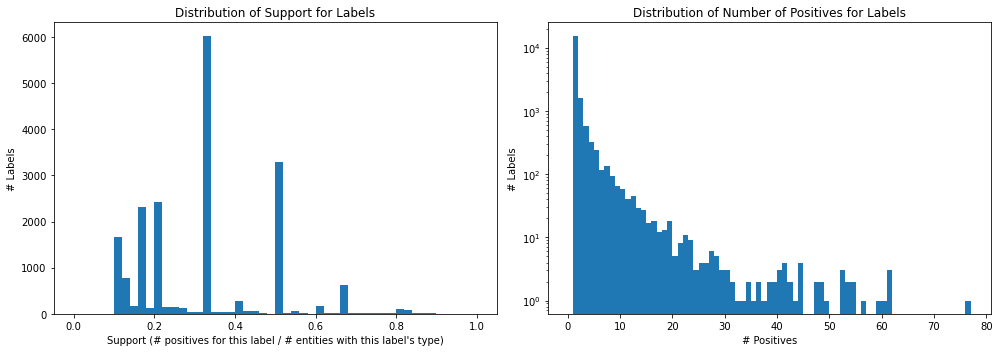

Examples of labels at percentiles of support...
0th percentile:
node1             Q4830453
label                  P17
node2                  Q31
prop_label    'country'@en
positives                5
support                0.1
id                  E19999
Name: 0, dtype: object

25th percentile:
node1                       Q20181813
label                              P6
node2                         Q966436
prop_label    'head of government'@en
positives                           1
support                      0.166667
id                             E23231
Name: 3232, dtype: object

50th percentile:
node1                    Q859563
label                      P2936
node2                      Q5146
prop_label    'language used'@en
positives                      1
support                 0.333333
id                        E33444
Name: 13445, dtype: object

75th percentile:
node1                          Q123480
label                             P530
node2                             Q213
pro

In [62]:
plot_label_supports_and_positives(rel_file)

### RAVLs

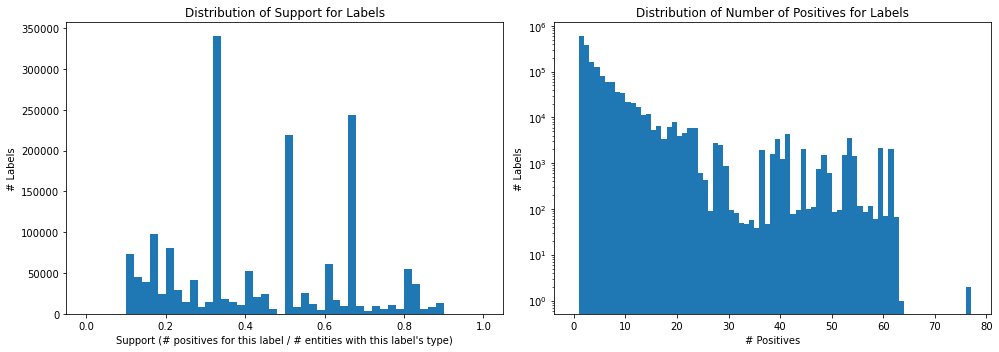

Examples of labels at percentiles of support...
0th percentile:
node1                              Q4830453
label                                   P17
node2                               Q179164
prop2                                 P1081
val                                   0.806
prop2_label    'Human Development Index'@en
positives                                 5
support                                 0.1
id                                  E558641
Name: 0, dtype: object

25th percentile:
node1                  Q112099
label                     P530
node2                    Q7270
prop2                    P1082
val                   26372358
prop2_label    'population'@en
positives                    3
support               0.272727
id                     E994884
Name: 436243, dtype: object

50th percentile:
node1                                Q43702
label                                  P530
node2                                 Q6256
prop2                                 P108

In [63]:
plot_label_supports_and_positives(ravl_file)

### RAILs

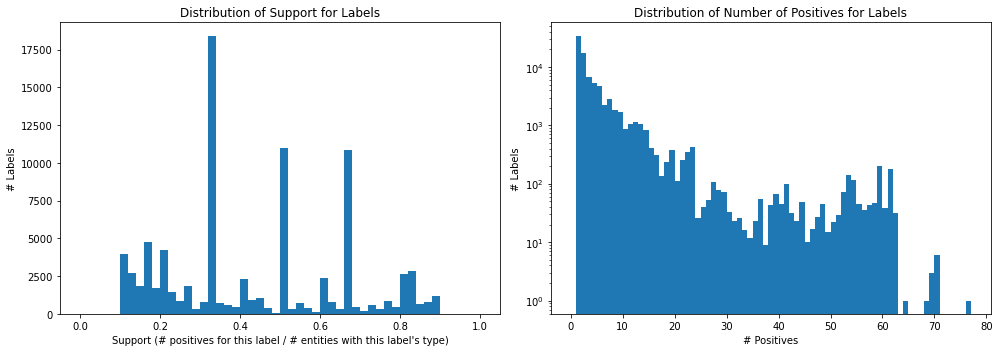

Examples of labels at percentiles of support...
0th percentile:
node1           Q4830453
label                P17
node2            Q179164
prop2              P2046
prop2_label    'area'@en
positives              5
support              0.1
id                E24332
Name: 0, dtype: object

25th percentile:
node1                              Q123480
label                                 P530
node2                                Q6256
prop2                                P2132
prop2_label    'nominal GDP per capita'@en
positives                                4
support                           0.266667
id                                  E46367
Name: 22035, dtype: object

50th percentile:
node1                            Q112099
label                               P530
node2                          Q20181813
prop2                              P4841
prop2_label    'total fertility rate'@en
positives                              4
support                         0.363636
id                 

In [64]:
plot_label_supports_and_positives(rail_file)

### All

/opt/anaconda3/envs/kgtk-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


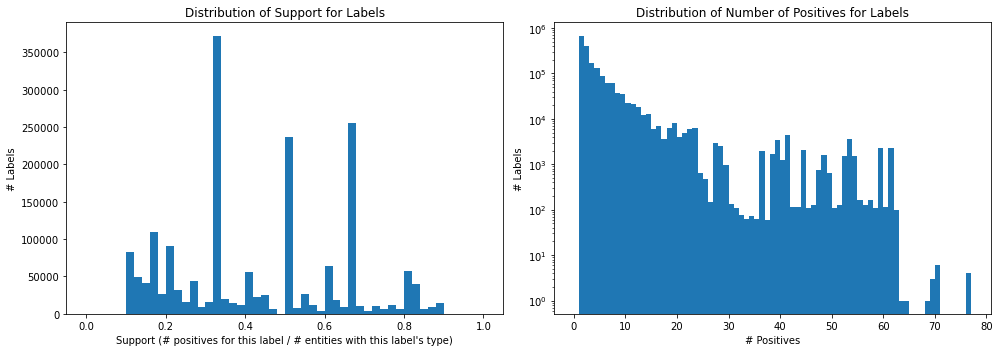

Examples of labels at percentiles of support...
0th percentile:
node1                        Q431289
label                           P373
node2                         Tuborg
prop_label     'Commons category'@en
positives                          1
support                          0.1
id                             E1944
si_units                         NaN
wd_units                         NaN
upper_bound                      NaN
prop2                            NaN
val                              NaN
prop2_label                      NaN
Name: 0, dtype: object

25th percentile:
node1                                          Q6256
label                                            P47
node2                                       Q3624078
prop_label                                       NaN
positives                                          7
support                                     0.269231
id                                            E46424
si_units                                   

In [65]:
plot_label_supports_and_positives(all_file)